In [1]:
import numpy as np
import matplotlib.pyplot as plt

deg2rad = np.pi / 180.0
rad2deg = 180.0 / np.pi

R = 6.96e8
dt = 0.01
alpha = 6.048e13
dphi = 2*deg2rad
dtheta1_d = 2*3
dtheta2_d = 2
dtheta3_d = 2
tot_time = 365
N_steps = int(tot_time / dt)
N_phi = int(2*np.pi/ dphi)
v_mer_max = 1.296e6
omega_max_deg = 13.38
omega_max = omega_max_deg*deg2rad

theta_1n = np.arange(5, 30, dtheta1_d)
theta_2n = np.arange(30, 60, dtheta2_d)
theta_3 = np.arange(60, 120, dtheta3_d)
theta_2s = np.arange(120, 150, dtheta2_d)
theta_1s = np.arange(150, 180 - 5, dtheta1_d)

print("theta_1n:", theta_1n.shape)
print("theta_2n:", theta_2n.shape)  
print("theta_3:", theta_3.shape)
print("theta_2s:", theta_2s.shape)
print("theta_1s:", theta_1s.shape)

N_theta = (len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s) + len(theta_1s))
theta_deg = np.concatenate((theta_1n, theta_2n, theta_3, theta_2s, theta_1s))

theta = theta_deg * deg2rad
dtheta1 = dtheta1_d * deg2rad
dtheta2 = dtheta2_d * deg2rad
dtheta3 = dtheta3_d * deg2rad

delta_x = R*np.min(np.sin(theta))*dphi
delta_y = R*dtheta3

stab_par = min((min(delta_x**2,delta_y**2))/(4*alpha), delta_y/v_mer_max, dphi/omega_max)
print(f"stab_par: {stab_par}")
assert dt <= stab_par, "Stability condition violated!!!!!!!!!!!"

phi = np.arange(0, 2 * np.pi, dphi)
Phi, Theta = np.meshgrid(phi, theta)

Phi_deg = Phi * rad2deg
Theta_deg = Theta * rad2deg

theta_1n: (5,)
theta_2n: (15,)
theta_3: (30,)
theta_2s: (15,)
theta_1s: (5,)
stab_par: 0.01853332956548756


In [2]:
(4*deg2rad)**2

0.004873878716587337

In [3]:
np.min(np.sin(theta))

np.float64(0.08715574274765817)

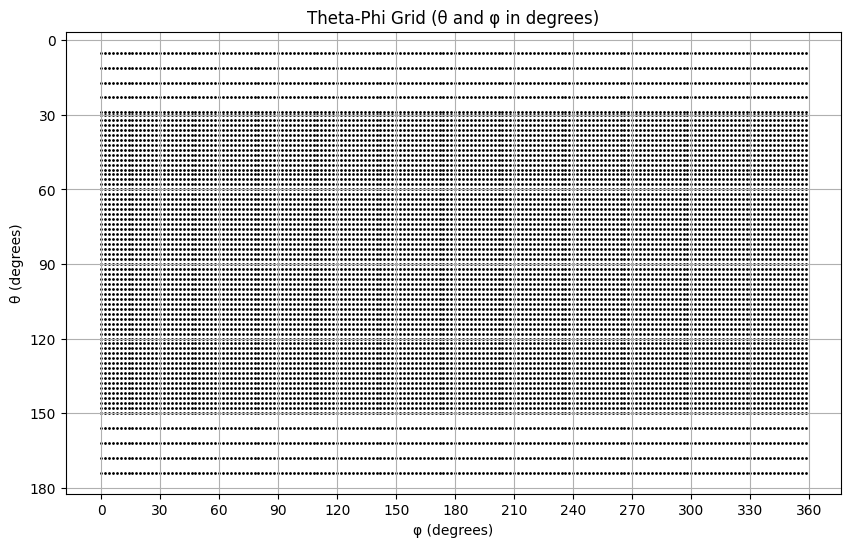

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(Phi_deg, Theta_deg, s=1, color='black')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.gca().invert_yaxis()
plt.title("Theta-Phi Grid (θ and φ in degrees)")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.show()

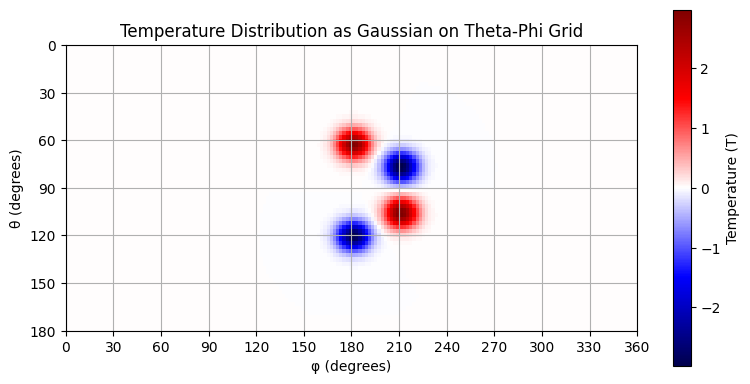

In [5]:
sigma_t = 5 * deg2rad
sigma_p = 7.07 * deg2rad 
T_plus_1 = 3*np.exp(-0.5*(((Theta - (9*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(6/6))/sigma_p)**2))
T_minus_1 = -3*np.exp(-0.5*(((Theta - (10.5*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(7/6))/sigma_p)**2))
T_plus_2 = 3*np.exp(-0.5*(((Theta - (13.5*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(7/6))/sigma_p)**2))
T_minus_2 = -3*np.exp(-0.5*(((Theta - (15*np.pi/24) )/sigma_t)**2+((Phi - np.pi*(6/6))/sigma_p)**2))
T = T_plus_1 + T_minus_1 + T_plus_2 + T_minus_2
plt.figure(figsize=(8, 4))
plt.imshow(T, extent=(0, 360, 0, 180), aspect='equal', origin='lower', cmap='seismic')
plt.colorbar(label='Temperature (T)')
plt.xlabel("φ (degrees)")
plt.ylabel("θ (degrees)")
plt.gca().invert_yaxis()
plt.title("Temperature Distribution as Gaussian on Theta-Phi Grid")
plt.xticks(np.arange(0, 361, 30))
plt.yticks(np.arange(0, 181, 30))
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
N_phi, N_theta

(180, 70)

In [7]:
Phi.shape

(70, 180)

In [8]:
dtheta_rad = np.zeros(N_theta)
dtheta_rad[:len(theta_1n)] = dtheta1
dtheta_rad[len(theta_1n):len(theta_1n) + len(theta_2n)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n):len(theta_1n) + len(theta_2n) + len(theta_3)] = dtheta3
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3):len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s)] = dtheta2
dtheta_rad[len(theta_1n) + len(theta_2n) + len(theta_3) + len(theta_2s):] = dtheta1

In [9]:
dtheta_rad

array([0.10471976, 0.10471976, 0.10471976, 0.10471976, 0.10471976,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.03490659, 0.03490659, 0.03490659, 0.03490659, 0.03490659,
       0.10471976, 0.10471976, 0.10471976, 0.10471976, 0.10471976])

In [10]:
print(T.shape)
T = T.T
print(T.shape)

(70, 180)
(180, 70)


In [11]:
omega = omega_max - (2.3 * (np.cos(theta))**2 - 1.62* (np.cos(theta))**4) * deg2rad

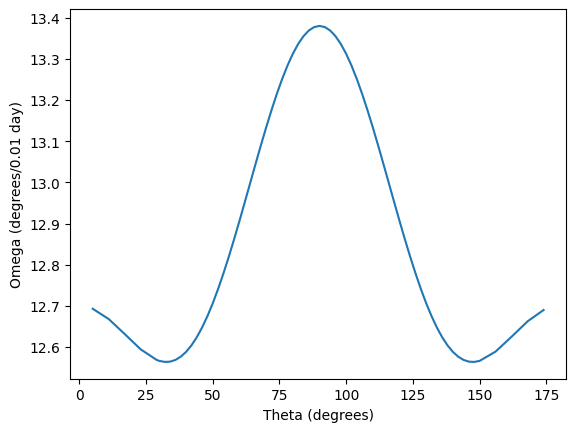

In [12]:
plt.plot(theta_deg, omega * rad2deg)
plt.xlabel("Theta (degrees)")
plt.ylabel(f"Omega (degrees/{dt} day)")
plt.show()

In [13]:
col = theta*rad2deg-90
v_mer = np.where(np.abs(col)<=75, v_mer_max * np.sin(np.pi * col / 75), 0)

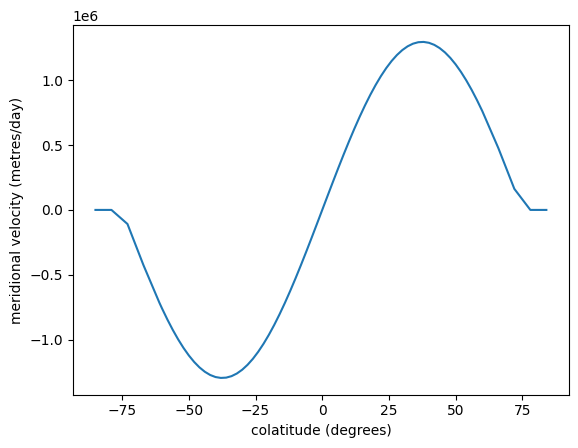

In [14]:
plt.plot(col, v_mer)
plt.xlabel("colatitude (degrees)")
plt.ylabel("meridional velocity (metres/day)")
plt.show()

In [15]:
cot = 1/np.tan(theta)
sin2 = (np.sin(theta))**2
senin = 1/(np.sin(theta))
cos = np.cos(theta)
sin = np.sin(theta)
all_values = np.zeros((N_steps+1, N_phi, N_theta))
all_values[0, :, :] = T
T_new = np.zeros_like(T)
T_new.shape

(180, 70)

In [16]:
accum_bottom = np.zeros(N_phi)
accum_top = np.zeros(N_phi)

In [17]:
C_phi_local = np.abs(omega) * dt / dphi
C_theta_local = np.abs(v_mer) * dt / (R * dtheta_rad)

print(f"Max C_phi = {np.max(C_phi_local):.4f}, Max C_theta = {np.max(C_theta_local):.4f}")

if np.max(C_phi_local) > 1.0 or np.max(C_theta_local) > 1.0:
    print("Warning: Local advection CFL > 1 — explicit scheme may become unstable.")


Max C_phi = 0.0669, Max C_theta = 0.0005


In [18]:
for n in range(1,N_steps+1):
    for i in range(1,N_phi-1):
        for j in range(1,N_theta):
            if j==1 or j==N_theta-1:
                diffusion = 0
            else:
                diffusion = (alpha/(R**2)) * dt * (((T[i, j+1] - 2*T[i, j] + T[i, j-1])/dtheta_rad[j]**2) + 
                                                cot[j] * ((T[i,j]-T[i,j-1])/dtheta_rad[j])
                                                + (1/sin2[j]) * ((T[i+1, j] - 2*T[i, j] + T[i-1, j])/dphi**2))
            if v_mer[j]<0:
                advection_1 = dt * (-1*omega[j] * ((T[i+1, j] - T[i, j]) /dphi))
                advection_2 = dt * T[i, j] * v_mer[j] * cos[j]
                advection_3 = dt * v_mer[j] * sin[j] * ((T[i,j+1]-T[i,j])/dtheta_rad[j])
                advection_4 = dt * -1 * (T[i,j]/R) * (1/sin[j]) * (v_mer[j+1]-v_mer[j])/dtheta_rad[j]
            else:
                advection_1 = dt * (-1*omega[j] * ((T[i+1, j] - T[i, j]) /dphi))
                advection_2 = dt * T[i, j] * v_mer[j] * cos[j]
                advection_3 = dt * v_mer[j] * sin[j] * ((T[i,j]-T[i,j-1])/dtheta_rad[j])
                advection_4 = dt * -1 * (T[i,j]/R) * (1/sin[j]) * (v_mer[j]-v_mer[j-1])/dtheta_rad[j]
            T_new[i,j] = T[i,j] + diffusion + advection_1 -(senin[j]/R)*(advection_2 + advection_3) + advection_4
    if np.any(np.isnan(T_new)) or np.any(np.isinf(T_new)):
        print(f"Numerical instability at step {n}")
        print(f"Max value in T_new: {np.nanmax(T_new)}, Min value: {np.nanmin(T_new)}")
        bad_indices = np.argwhere(~np.isfinite(T_new))
        print(f"Non-finite entries at indices (i,j): {bad_indices[:10]}")
        break
    T_new[0, 1:-1] = T_new[-2, 1:-1] 
    T_new[-1, 1:-1] = T_new[1, 1:-1]

    accum_bottom += T_new[:, 1]
    accum_top += T_new[:, -2]

    T_new[1:-1, 0] = T_new[1:-1, 1]
    T_new[1:-1, -1] = T_new[1:-1, -2]
    T = T_new.copy()
    all_values[n, :, :] = T
    all_values[n, :, 0] = accum_bottom
    all_values[n, :, -1] = accum_top

Numerical instability at step 6077
Max value in T_new: inf, Min value: -inf
Non-finite entries at indices (i,j): [[84 40]
 [85 40]
 [86 40]
 [87 40]
 [87 41]
 [88 40]
 [88 41]
 [89 40]
 [89 41]
 [90 40]]


/tmp/ipykernel_3109/126736943.py:18: RuntimeWarning: overflow encountered in scalar multiply
  advection_3 = dt * v_mer[j] * sin[j] * ((T[i,j]-T[i,j-1])/dtheta_rad[j])
/tmp/ipykernel_3109/126736943.py:20: RuntimeWarning: overflow encountered in scalar add
  T_new[i,j] = T[i,j] + diffusion + advection_1 -(senin[j]/R)*(advection_2 + advection_3) + advection_4


In [19]:
all_values = np.transpose(all_values, (0, 2, 1))

In [20]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
#vmin = np.min(all_values)
#vmax = np.max(all_values)
cax = ax.imshow(all_values[0], extent=[0, 360, 0, 180], aspect='equal', origin='lower', cmap='seismic', vmin=-5, vmax=5)
fig.colorbar(cax, label='Temperature')
ax.set_title('2D Heat Diffusion')
ax.set_ylabel('θ (degrees)')
ax.set_xlabel('φ (degrees)')
ax.set_xticks(np.arange(0, 361, 30))
ax.set_yticks(np.arange(0, 181, 15))
ax.grid(True)
ax.invert_yaxis()

def animate(frame):
    data = all_values[frame]
    ax.set_title(f'2D Heat Diffusion at t = {frame*dt:.2f} days')
    cax.set_data(data)
    return [cax]

interval_steps = 1000
ani = FuncAnimation(fig, animate, frames=range(0, N_steps+1, interval_steps), interval=100, blit=True, repeat=False)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())